I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline   

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.vscode', 'CSE_MINI_PROJECT_Report.docx', 'dataset.csv', 'Disease Prediction using Machine Learning.pptx', 'Hearrt_disease.ipynb', 'm.py', 'rf.pkl', '~$E_MINI_PROJECT_Report.docx']


II. Importing and understanding our dataset

In [2]:
dataset = pd.read_csv("dataset.csv")

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape

(303, 14)

In [5]:
print(dataset.isna().sum()) #imissing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
dup_row=dataset[dataset.duplicated()]  #duplicated rows
print("Duplicate Rows: \n{}".format(dup_row))

Duplicate Rows: 
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [7]:
DF_RM_DUP = dataset.drop_duplicates(keep='first')
print('\n\nDuplicate value removed from DataFrame' )
dataset=DF_RM_DUP



Duplicate value removed from DataFrame


In [8]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0


In [10]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure","serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)","maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:		resting blood pressure
chol:		serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		resting electrocardiographic results (values 0,1,2)
thalach:		maximum heart rate achieved
exang:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slope:		the slope of the peak exercise ST segment
ca:		number of major vessels (0-3) colored by flourosopy
thal:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing the 'target' variable

In [13]:
dataset["target"].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [14]:
dataset["target"].unique()

array([1, 0], dtype=int64)

Clearly, this is a classification problem, with the target variable having values '0' and '1'

Checking correlation between columns

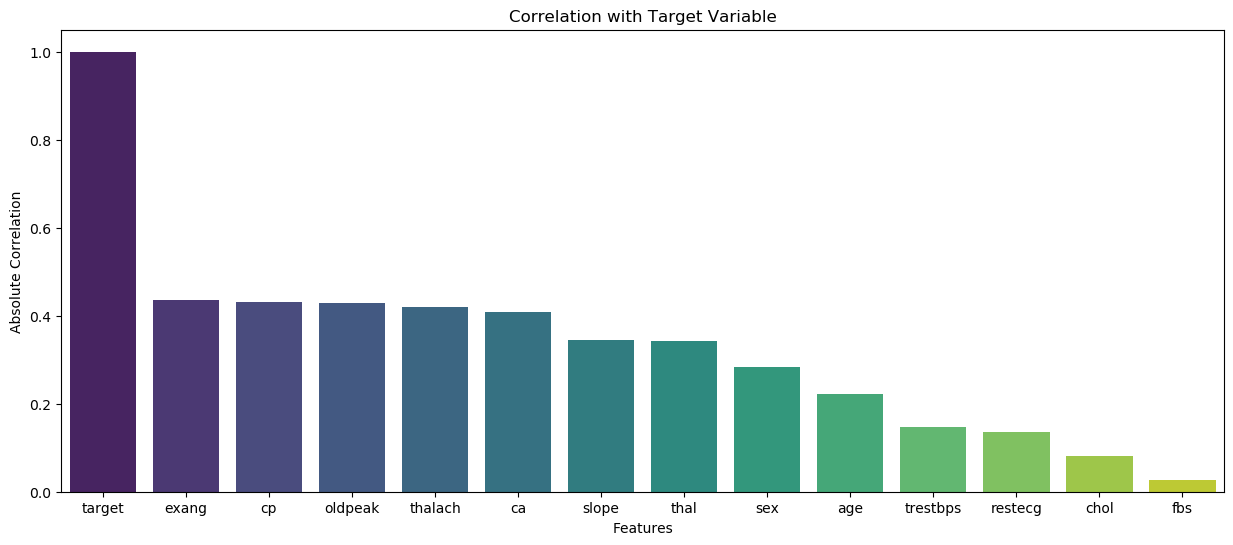

In [15]:
correlations = dataset.corr()["target"].abs().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

In [16]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

Exploratory Data Analysis (EDA)

First, analysing the target variable:

1    164
0    138
Name: target, dtype: int64


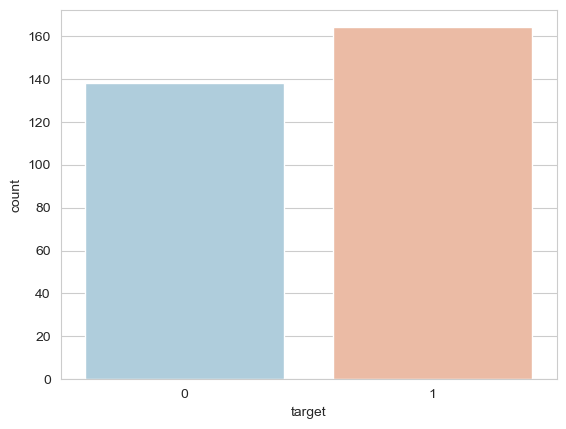

In [17]:
sns.set_style('whitegrid')
sns.countplot(x = 'target',data = dataset,palette = 'RdBu_r')
value_counts = dataset['target'].value_counts()
print(value_counts)


In [18]:
print("Percentage of patience without heart problems: "+str(round(value_counts[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(value_counts[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.13


Analysing the 'Sex' feature

In [19]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

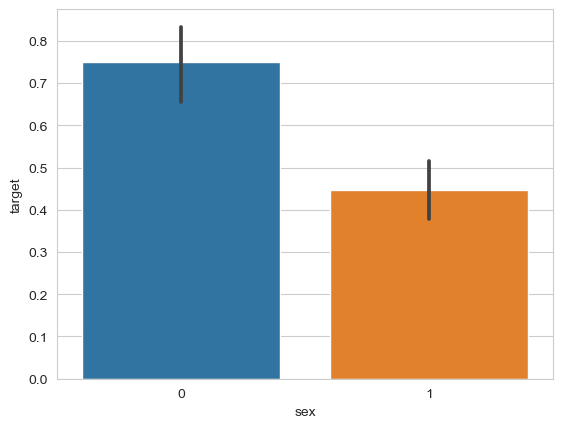

In [20]:
y = dataset["target"]
sns.barplot(x=dataset["sex"], y=y)


#We notice, that females are more likely to have heart problems than males

Analysing the 'Chest Pain Type' feature

In [21]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

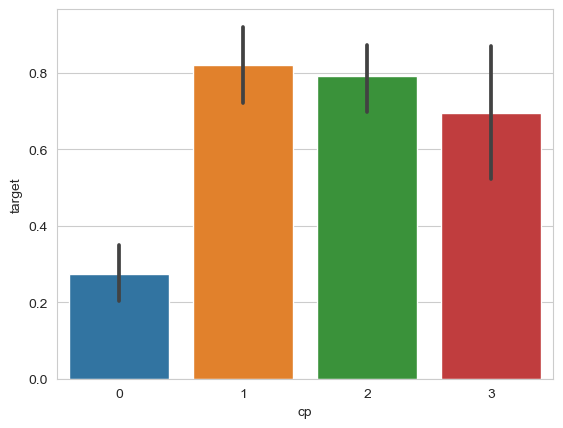

In [22]:
sns.barplot(x=dataset["cp"], y=y)

In [23]:
#We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

Analysing the FBS feature

In [24]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

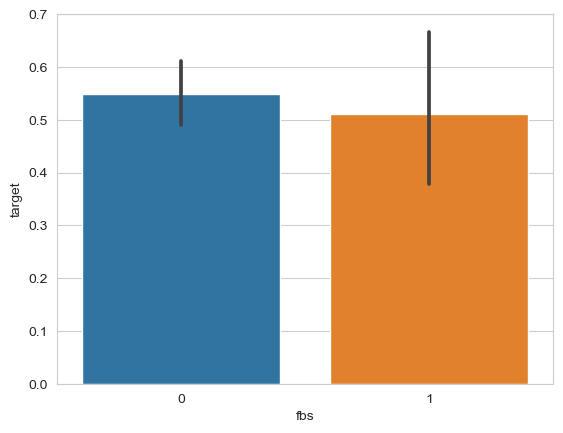

In [25]:
sns.barplot(x = dataset["fbs"],y =y)

Analysing the restecg feature

In [26]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

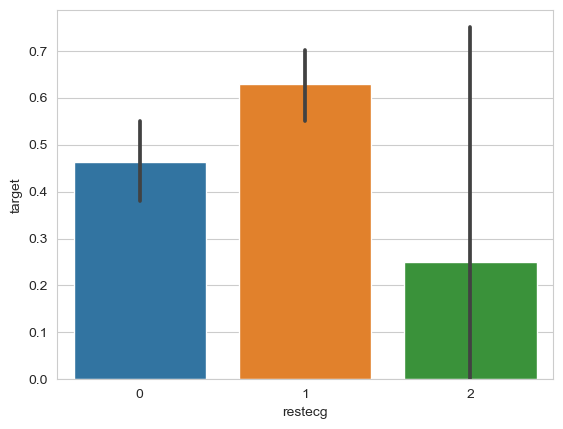

In [27]:
sns.barplot(x = dataset["restecg"],y =y)

In [28]:
#We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

Analysing the 'exang' feature

In [29]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

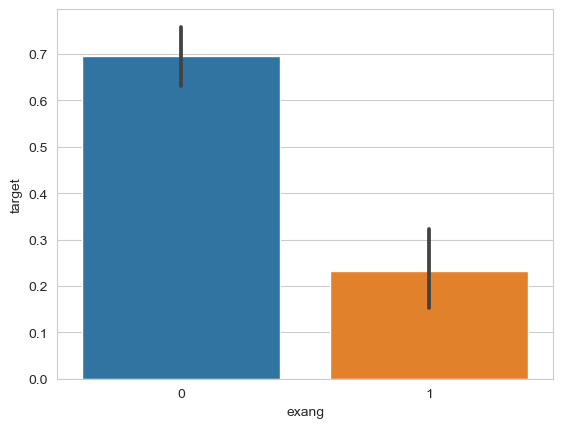

In [30]:
sns.barplot(x = dataset["exang"],y =y)

In [31]:
#People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

Analysing the Slope feature

In [32]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

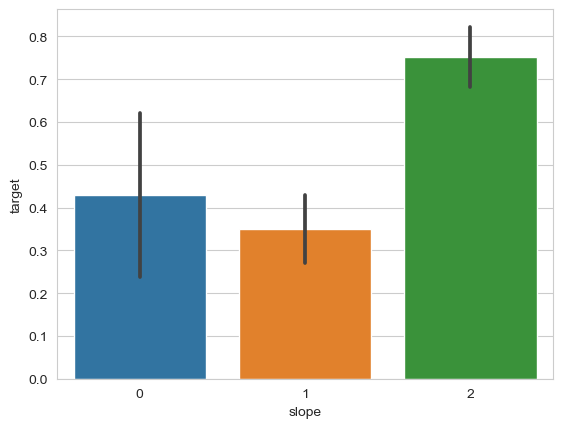

In [33]:
sns.barplot(x =dataset["slope"],y =y)

In [34]:
#We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

Analysing the 'ca' feature

In [35]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

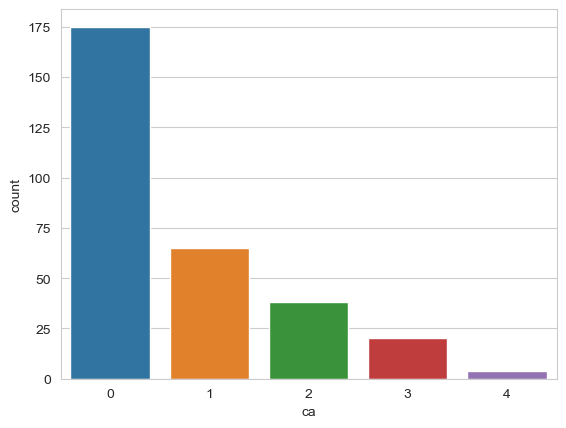

In [36]:
sns.countplot(x=dataset["ca"])

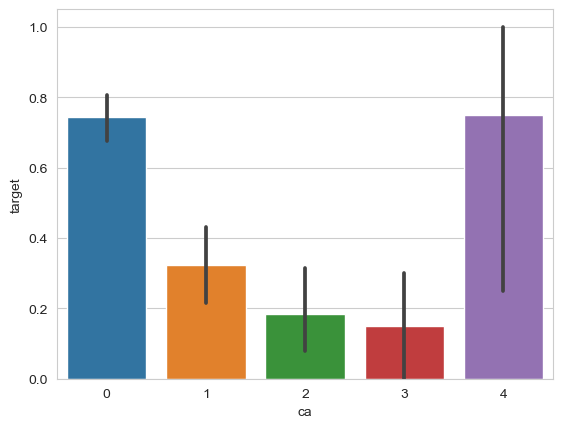

In [37]:
sns.barplot(x =dataset["ca"],y=y)

In [38]:
#ca=4 has astonishingly large number of heart patients

Analysing the 'thal' feature

In [39]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

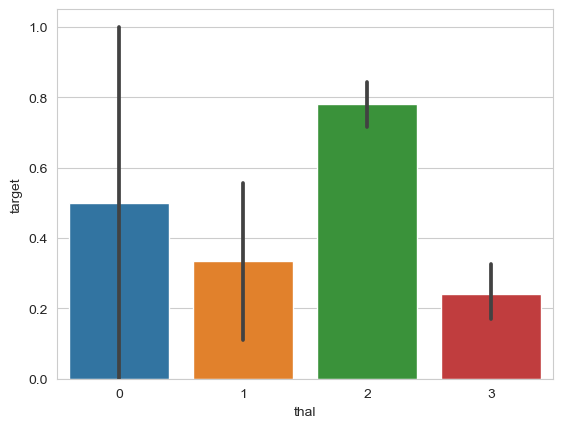

In [40]:
sns.barplot(x =dataset["thal"],y= y)

 IV. Train Test split

In [41]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [42]:
X_train.shape

(241, 13)

In [43]:
X_test.shape

(61, 13)

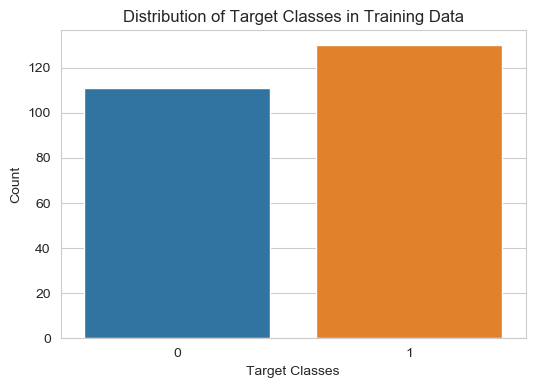

1    130
0    111
Name: target, dtype: int64


In [44]:
Y_train.shape
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_train)
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.title("Distribution of Target Classes in Training Data")
plt.show()
class_counts = pd.Series(Y_train).value_counts()
print(class_counts)

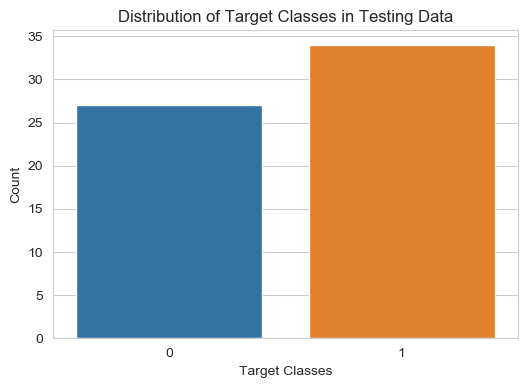

1    34
0    27
Name: target, dtype: int64


In [45]:
Y_test.shape
plt.figure(figsize=(6, 4))
sns.countplot(x=Y_test)
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.title("Distribution of Target Classes in Testing Data")
plt.show()
class_counts = pd.Series(Y_test).value_counts()
print(class_counts)

V. Model Fitting

In [46]:
from sklearn.metrics import accuracy_score,f1_score

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [48]:
Y_pred_lr.shape

(61,)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_lr)
accuracy_score(Y_test, Y_pred_lr)

0.8524590163934426

In [50]:
arr2=[62,1,1,120,281,0,0,103,0,1.4,1,1,3]
print(lr.predict(np.array([arr2])))

[0]


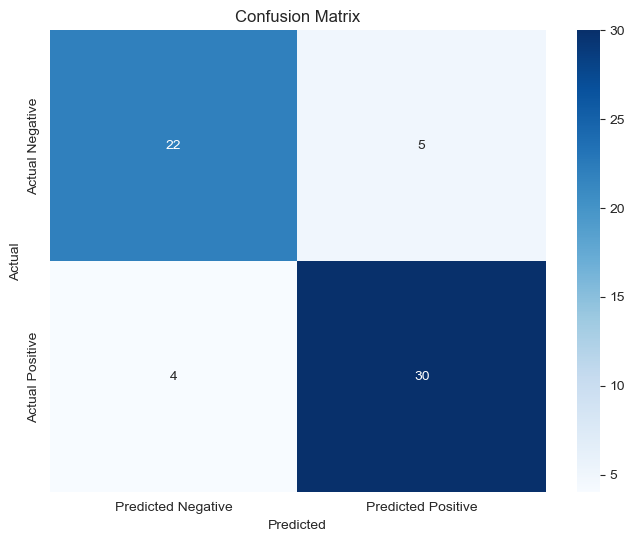

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [52]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("F1 Score",end = ' ')
print(f1_score(lr.predict(X_test),Y_test)*100)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

F1 Score 86.95652173913044
The accuracy score achieved using Logistic Regression is: 85.25 %


K Nearest Neighbors

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn_classifier,X_train,Y_train,cv = 10)
    knn_scores.append(score.mean())

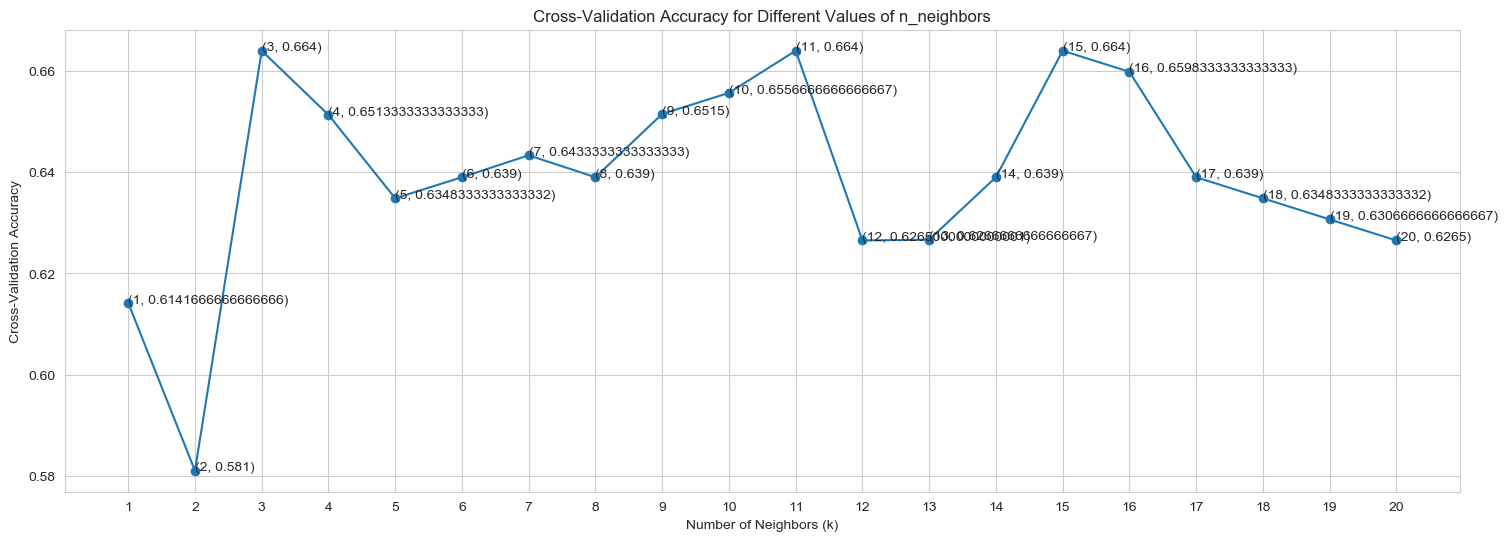

In [54]:
plt.figure(figsize=(18, 6))
plt.plot( range(1,21), knn_scores, marker='o')
for i in range(1,21):
    plt.text(i, knn_scores[i-1],(i,knn_scores[i-1]))
plt.title('Cross-Validation Accuracy for Different Values of n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.xticks(range(1, 21))
plt.show()

In [55]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [56]:
Y_pred_knn.shape

(61,)

In [57]:
arr2=[62,1,1,120,281,0,0,103,0,1.4,1,1,3]
print(knn.predict(np.array([arr2])))

[0]


In [58]:
cm = confusion_matrix(Y_test, Y_pred_knn)
accuracy_score(Y_test, Y_pred_knn)

0.6885245901639344

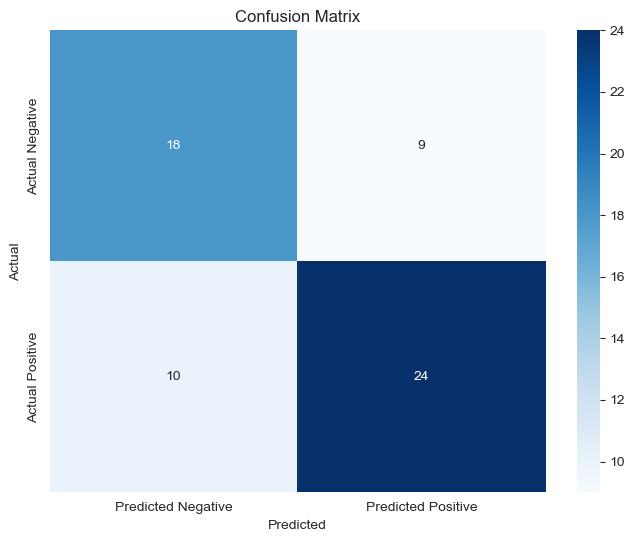

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [60]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("F1 Score",end = ' ')
print(f1_score(knn.predict(X_test),Y_test)*100)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

F1 Score 71.64179104477613
The accuracy score achieved using KNN is: 68.85 %


Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
        dt = DecisionTreeClassifier(random_state=x)
        dt.fit(X_train,Y_train)
        Y_pred_dt = dt.predict(X_test)
        current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
        if(current_accuracy>max_accuracy):
            max_accuracy = current_accuracy
            best_x = x
        

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [62]:
print(best_x)

0


In [63]:
print(Y_pred_dt.shape)

(61,)


In [64]:
arr2=[62,1,1,120,281,0,0,103,0,1.4,1,1,3]
print(dt.predict(np.array([arr2])))

[0]


In [65]:
cm = confusion_matrix(Y_test, Y_pred_dt)
accuracy_score(Y_test, Y_pred_dt)

0.7868852459016393

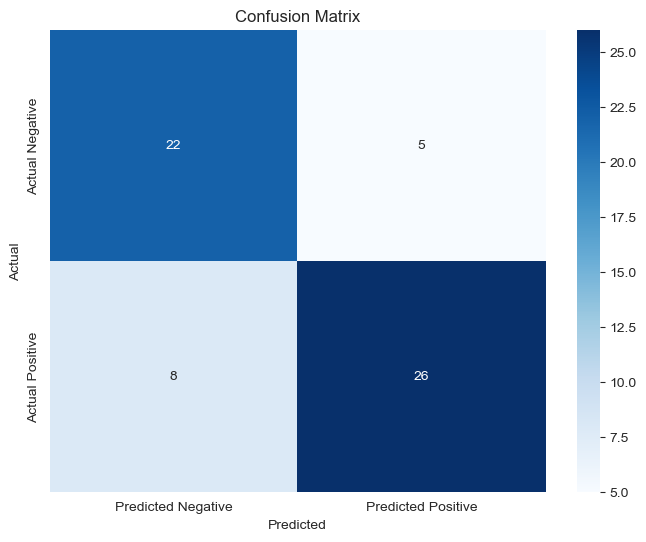

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [67]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("F1 Score",end = ' ')
print(f1_score(dt.predict(X_test),Y_test)*100)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

F1 Score 80.0
The accuracy score achieved using Decision Tree is: 78.69 %


Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        


rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [69]:
Y_pred_rf.shape

(61,)

In [70]:
arr2=[62,1,1,120,281,0,0,103,0,1.4,1,1,3]
print(rf.predict(np.array([arr2])))

[0]


In [71]:
cm = confusion_matrix(Y_test,Y_pred_rf)
accuracy_score(Y_test, Y_pred_rf)

0.9016393442622951

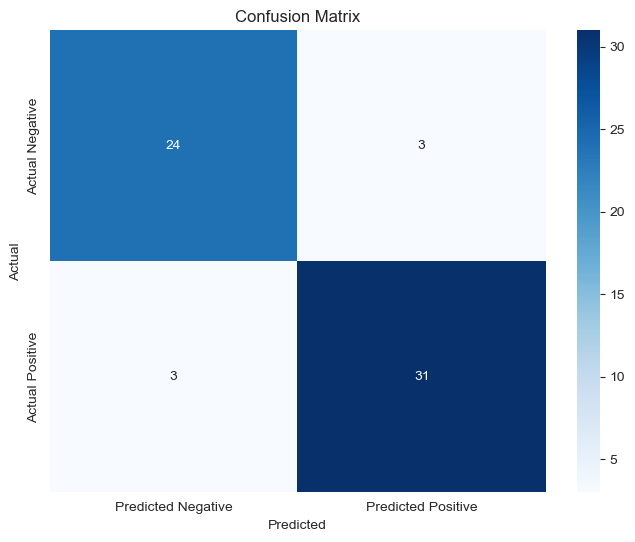

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [73]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("F1 Score",end = ' ')
print(f1_score(rf.predict(X_test),Y_test)*100)
print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

F1 Score 91.17647058823528
The accuracy score achieved using Decision Tree is: 90.16 %



Linear Support Vector Machine

In [74]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [75]:
cm = confusion_matrix(Y_test,Y_pred_svm)
accuracy_score(Y_test, Y_pred_svm)

0.8688524590163934

In [76]:
arr2=[62,1,1,120,281,0,0,103,0,1.4,1,1,3]
print(sv.predict(np.array([arr2])))

[0]


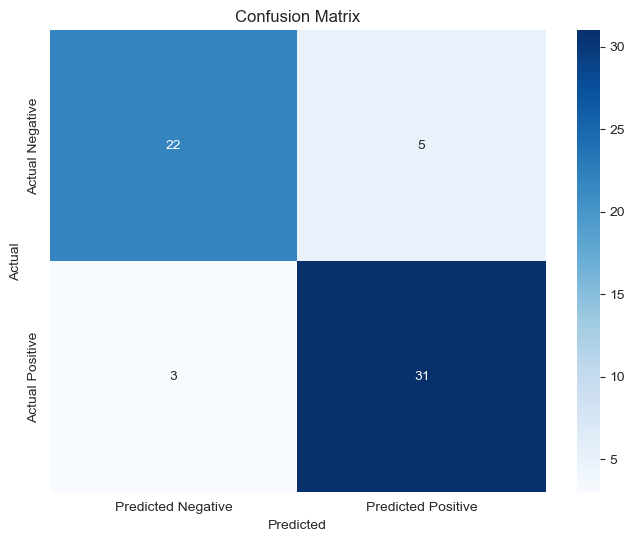

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [78]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("F1 Score",end = ' ')
print(f1_score(sv.predict(X_test),Y_test)*100)


print("The accuracy score achieved using Decision Tree is: "+str(score_svm)+" %")

F1 Score 88.57142857142858
The accuracy score achieved using Decision Tree is: 86.89 %


VI. Output final score

In [79]:
scores = [score_lr,score_knn,score_dt,score_rf,score_svm]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","Linear SVM"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using K-Nearest Neighbors is: 68.85 %
The accuracy score achieved using Decision Tree is: 78.69 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using Linear SVM is: 86.89 %


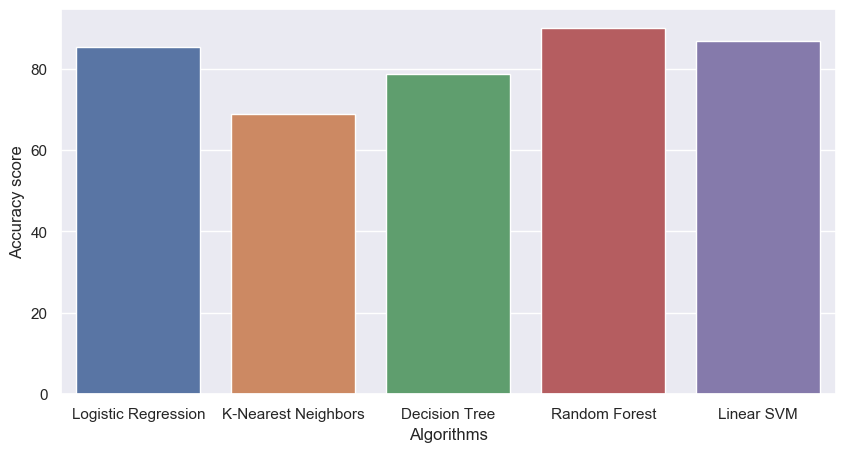

In [80]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x = algorithms,y =scores)